In [224]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [225]:
data = """eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039148,-122.39544
2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,,1.688E+12,America/Los_Angeles,41.03917,-122.39547
3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,,1.688E+12,America/Los_Angeles,41.03913,-122.39544
4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039177,-122.39542
5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039182,-122.39544
"""

In [226]:
df = pd.read_csv(StringIO(data))

In [227]:
df.head()

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039182,-122.39544


In [228]:
# Check for missing values
df.isnull().sum()

eventId       0
eventCount    0
uuid          0
eventFlag     0
ipAddress     2
timestamp     0
timezone      0
latitude      0
longitude     0
dtype: int64

In [229]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   eventId     5 non-null      int64  
 1   eventCount  5 non-null      int64  
 2   uuid        5 non-null      object 
 3   eventFlag   5 non-null      int64  
 4   ipAddress   3 non-null      object 
 5   timestamp   5 non-null      float64
 6   timezone    5 non-null      object 
 7   latitude    5 non-null      float64
 8   longitude   5 non-null      float64
dtypes: float64(3), int64(3), object(3)
memory usage: 488.0+ bytes


In [230]:
# filling na values of ip address with mode
df['ipAddress'].fillna(df['ipAddress'].mode()[0], inplace=True)

In [231]:
df.isnull().sum()

eventId       0
eventCount    0
uuid          0
eventFlag     0
ipAddress     0
timestamp     0
timezone      0
latitude      0
longitude     0
dtype: int64

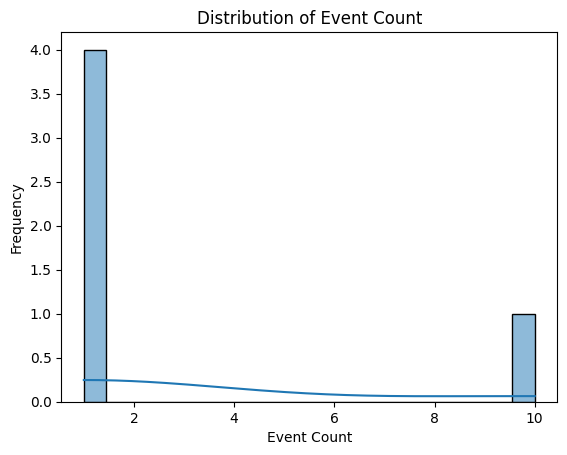

In [232]:
# Summary statistics
summary_stats = df.describe()

# Visualize eventCount distribution
sns.histplot(df['eventCount'], bins=20, kde=True)
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.title('Distribution of Event Count')
plt.show()

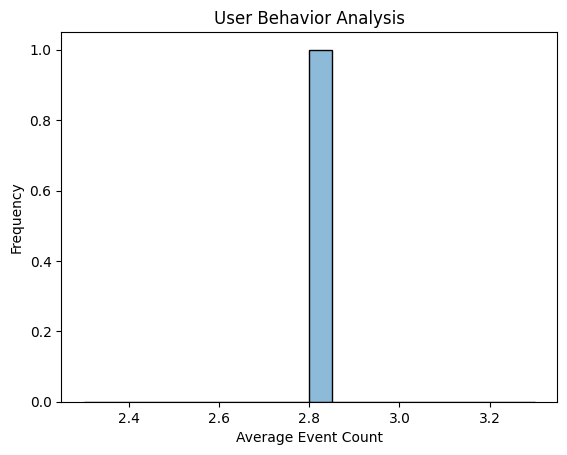

In [233]:
# Calculate average event count per user
avg_event_count_per_user = df.groupby('uuid')['eventCount'].mean()

# Visualize user behavior
sns.histplot(avg_event_count_per_user, bins=20, kde=True)
plt.xlabel('Average Event Count')
plt.ylabel('Frequency')
plt.title('User Behavior Analysis')
plt.show()

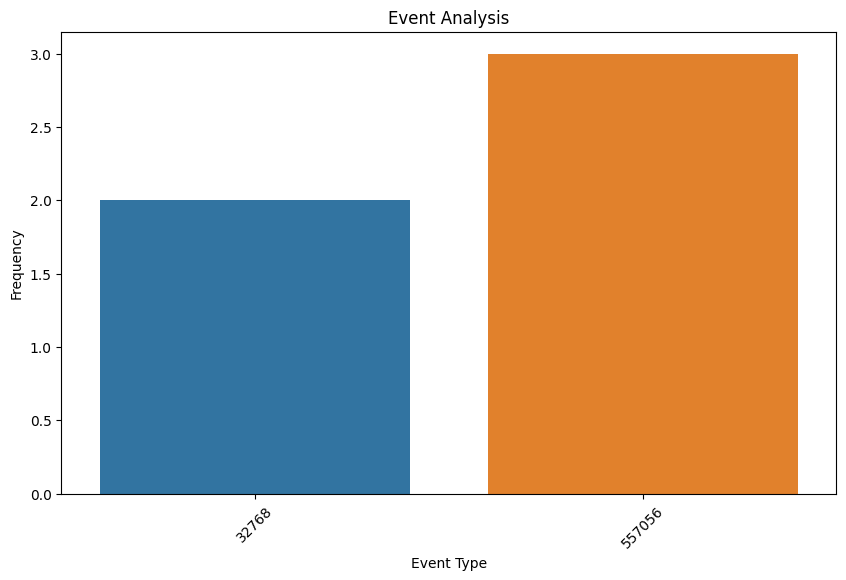

In [234]:
# Event frequencies
event_frequencies = df['eventFlag'].value_counts()

# Visualize event frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=event_frequencies.index, y=event_frequencies.values)
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Event Analysis')
plt.xticks(rotation=45)
plt.show()

In [235]:
import folium

# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers for user locations
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Display the map
m

In [236]:
import random

# Create synthetic data
num_synthetic_samples = 100 # Adjust the number of synthetic samples as needed

synthetic_data = pd.DataFrame({
    'eventId': np.arange(len(data) + 1, len(data) + 1 + num_synthetic_samples).astype(int),
    'eventCount': np.random.randint(1, 20, size=num_synthetic_samples).astype(int),
    'uuid': ['synthetic_user'] * num_synthetic_samples,
    'eventFlag': np.random.choice([32768, 557056], size=num_synthetic_samples).astype(int),
    'ipAddress': ['synthetic_ip'] * num_synthetic_samples,
    'timestamp': np.random.uniform(1.688E+12, 1.689E+12, size=num_synthetic_samples).astype(int),
    'timezone': ['America/Los_Angeles'] * num_synthetic_samples,
    'latitude': np.random.uniform(40, 42, size=num_synthetic_samples),
    'longitude': np.random.uniform(-123, -121, size=num_synthetic_samples)
})

print(synthetic_data)

    eventId  eventCount            uuid  eventFlag     ipAddress   timestamp  \
0       619          10  synthetic_user     557056  synthetic_ip -2147483648   
1       620          12  synthetic_user      32768  synthetic_ip -2147483648   
2       621          12  synthetic_user     557056  synthetic_ip -2147483648   
3       622          18  synthetic_user      32768  synthetic_ip -2147483648   
4       623          16  synthetic_user      32768  synthetic_ip -2147483648   
5       624           6  synthetic_user     557056  synthetic_ip -2147483648   
6       625          15  synthetic_user      32768  synthetic_ip -2147483648   
7       626           2  synthetic_user      32768  synthetic_ip -2147483648   
8       627           9  synthetic_user     557056  synthetic_ip -2147483648   
9       628          10  synthetic_user     557056  synthetic_ip -2147483648   
10      629           5  synthetic_user      32768  synthetic_ip -2147483648   
11      630          17  synthetic_user 

C:\Users\pravin\AppData\Local\Temp\ipykernel_3280\893505982.py:12: RuntimeWarning: invalid value encountered in cast
  'timestamp': np.random.uniform(1.688E+12, 1.689E+12, size=num_synthetic_samples).astype(int),


In [237]:
# Anomly Detection
from sklearn.ensemble import IsolationForest

# Select relevant features for anomaly detection (e.g., 'eventCount')
features = ['eventCount']

# Create a new DataFrame with selected features
X = synthetic_data[features]

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data
clf.fit(X)

# Predict outliers (anomalies)
outliers = clf.predict(X)

# Create a new column in the DataFrame to mark anomalies (1 for inliers, -1 for outliers)
synthetic_data['anomaly'] = outliers

# Display the rows where anomalies were detected
anomalies = synthetic_data[synthetic_data['anomaly'] == -1]

# Print the anomalies
print("Anomalies Detected:")
print(anomalies)


Anomalies Detected:
    eventId  eventCount            uuid  eventFlag     ipAddress   timestamp  \
21      640          19  synthetic_user      32768  synthetic_ip -2147483648   
52      671          19  synthetic_user      32768  synthetic_ip -2147483648   
53      672           1  synthetic_user     557056  synthetic_ip -2147483648   
91      710          19  synthetic_user     557056  synthetic_ip -2147483648   

               timezone   latitude   longitude  anomaly  
21  America/Los_Angeles  41.350044 -121.426789       -1  
52  America/Los_Angeles  41.858728 -121.279470       -1  
53  America/Los_Angeles  40.847135 -122.223859       -1  
91  America/Los_Angeles  41.051517 -122.839521       -1  


In [238]:
#ML Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target variable (adjust as needed)
features = ['eventCount', 'latitude', 'longitude']
target = 'eventFlag'

# Split data into training and testing sets
X = synthetic_data[features]
y = synthetic_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6
